原文代码作者：François Chollet

github：https://github.com/fchollet/deep-learning-with-python-notebooks

中文注释制作：黄海广

github：https://github.com/fengdu78

代码全部测试通过。

配置环境：keras 2.2.1（原文是2.0.8，运行结果一致），tensorflow 1.8，python 3.6，

主机：显卡：一块1080ti；内存：32g（注：绝大部分代码不需要GPU）
![公众号](data/gongzhong.jpg)

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

# Classifying movie reviews: a binary classification example
# 电影评论分类：二分类问题

This notebook contains the code samples found in Chapter 3, Section 5 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

----


Two-class classification, or binary classification, may be the most widely applied kind of machine learning problem. In this example, we 
will learn to classify movie reviews into "positive" reviews and "negative" reviews, just based on the text content of the reviews.

二分类问题可能是应用最广泛的机器学习问题。在这个例子中，你将学习根据电影评论的文字内容将其划分为正面或负面。

## The IMDB dataset
## IMDB 数据集

We'll be working with "IMDB dataset", a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000 
reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.

Why do we have these two separate training and test sets? You should never test a machine learning model on the same data that you used to 
train it! Just because a model performs well on its training data doesn't mean that it will perform well on data it has never seen, and 
what you actually care about is your model's performance on new data (since you already know the labels of your training data -- obviously 
you don't need your model to predict those). For instance, it is possible that your model could end up merely _memorizing_ a mapping between 
your training samples and their targets -- which would be completely useless for the task of predicting targets for data never seen before. 
We will go over this point in much more detail in the next chapter.

Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) 
have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

The following code will load the dataset (when you run it for the first time, about 80MB of data will be downloaded to your machine):

本节使用 IMDB 数据集，它包含来自互联网电影数据库（IMDB）的 50 000 条严重两极分化的评论。数据集被分为用于训练的 25 000 条评论与用于测试的 25 000 条评论，训练集和测试集都包含 50% 的正面评论和 50% 的负面评论。

为什么要将训练集和测试集分开？因为你不应该将训练机器学习模型的同一批数据再用于测试模型！模型在训练数据上的表现很好，并不意味着它在前所未见的数据上也会表现得很好，而且你真正关心的是模型在新数据上的性能（因为你已经知道了训练数据对应的标签，显然不再需要模型来进行预测）。例如，你的模型最终可能只是记住了训练样本和目标值之间的映射关系，但这对在前所未见的数据上进行预测毫无用处。下一章将会更详细地讨论这一点。

与 MNIST 数据集一样，IMDB 数据集也内置于 Keras 库。它已经过预处理：评论（单词序列） 已经被转换为整数序列，其中每个整数代表字典中的某个单词。
下列代码将会加载 IMDB 数据集（第一次运行时会下载大约 80MB 的数据，可以不翻墙，反复试几次）。


In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


The argument `num_words=10000` means that we will only keep the top 10,000 most frequently occurring words in the training data. Rare words 
will be discarded. This allows us to work with vector data of manageable size.

The variables `train_data` and `test_data` are lists of reviews, each review being a list of word indices (encoding a sequence of words). 
`train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive":

参数 num_words=10000 的意思是仅保留训练数据中前 10 000 个最常出现的单词。低频单词将被舍弃。这样得到的向量数据不会太大，便于处理。

train_data 和 test_data 这两个变量都是评论组成的列表，每条评论又是单词索引组成 的列表（表示一系列单词）。train_labels 和 test_labels 都是 0 和 1 组成的列表，其中 0 代表负面（negative），1 代表正面（positive）。


In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

Since we restricted ourselves to the top 10,000 most frequent words, no word index will exceed 10,000:

由于限定为前 10 000 个最常见的单词，单词索引都不会超过 10 000。

In [9]:
max([max(sequence) for sequence in train_data])

9999

For kicks, here's how you can quickly decode one of these reviews back to English words:

如果好奇的话，你可以用下列代码将索引解码为单词。

In [8]:
# word_index is a dictionary mapping words to an integer index（word_index 是一个将单词映射为整数索引的字典）
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words（键值颠倒，将整数索引映射为单词）
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
#将评论解码。注意，索引减去了 3，
# 因为 0、1、2 是为“padding”（填充）、“start of sequence”（序列开始）、“unknown”（未知词）分别保留的索引
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [9]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Preparing the data

## 准备数据
We cannot feed lists of integers into a neural network. We have to turn our lists into tensors. There are two ways we could do that:

* We could pad our lists so that they all have the same length, and turn them into an integer tensor of shape `(samples, word_indices)`, 
then use as first layer in our network a layer capable of handling such integer tensors (the `Embedding` layer, which we will cover in 
detail later in the book).
* We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence 
`[3, 5]` into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as 
first layer in our network a `Dense` layer, capable of handling floating point vector data.

We will go with the latter solution. Let's vectorize our data, which we will do manually for maximum clarity:

你不能将整数序列直接输入神经网络。你需要将列表转换为张量。转换方法有以下两种。

* 填充列表，使其具有相同的长度，再将列表转换成形状为 (samples, word_indices) 的整数张量，然后网络第一层使用能处理这种整数张量的层（即 Embedding 层，本书后面会详细介绍）。

* 对列表进行 one-hot 编码，将其转换为 0 和 1 组成的向量。举个例子，序列 [3, 5] 将会 被转换为 10 000 维向量，只有索引为 3 和 5 的元素是 1，其余元素都是 0。然后网络第一层可以用 Dense 层，它能够处理浮点数向量数据。

下面我们采用后一种方法将数据向量化。为了加深理解，你可以手动实现这一方法，如下所示。


In [11]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)（创建一个形状为 (len(sequences), dimension) 的零矩阵）
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):#enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，
                                            #同时列出数据和数据下标
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s（将 results[i] 的指定索引设为 1）
    return results

# Our vectorized training data（将训练数据向量化）
x_train = vectorize_sequences(train_data)
# Our vectorized test data（将测试数据向量化）
x_test = vectorize_sequences(test_data)

Here's what our samples look like now:

样本现在变成了这样：

In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

We should also vectorize our labels, which is straightforward:

你还应该将标签向量化，这很简单。

In [14]:
# Our vectorized labels（标签向量化）
y_train = np.asarray(train_labels).astype('float32')  
y_test = np.asarray(test_labels).astype('float32')

Now our data is ready to be fed into a neural network.

现在可以将数据输入到神经网络中。

## Building our network


Our input data is simply vectors, and our labels are scalars (1s and 0s): this is the easiest setup you will ever encounter. A type of 
network that performs well on such a problem would be a simple stack of fully-connected (`Dense`) layers with `relu` activations: `Dense(16, 
activation='relu')`

The argument being passed to each `Dense` layer (16) is the number of "hidden units" of the layer. What's a hidden unit? It's a dimension 
in the representation space of the layer. You may remember from the previous chapter that each such `Dense` layer with a `relu` activation implements 
the following chain of tensor operations:

`output = relu(dot(W, input) + b)`

Having 16 hidden units means that the weight matrix `W` will have shape `(input_dimension, 16)`, i.e. the dot product with `W` will project the 
input data onto a 16-dimensional representation space (and then we would add the bias vector `b` and apply the `relu` operation). You can 
intuitively understand the dimensionality of your representation space as "how much freedom you are allowing the network to have when 
learning internal representations". Having more hidden units (a higher-dimensional representation space) allows your network to learn more 
complex representations, but it makes your network more computationally expensive and may lead to learning unwanted patterns (patterns that 
will improve performance on the training data but not on the test data).

There are two key architecture decisions to be made about such stack of dense layers:

* How many layers to use.
* How many "hidden units" to chose for each layer.

In the next chapter, you will learn formal principles to guide you in making these choices. 
For the time being, you will have to trust us with the following architecture choice: 
two intermediate layers with 16 hidden units each, 
and a third layer which will output the scalar prediction regarding the sentiment of the current review. 
The intermediate layers will use `relu` as their "activation function", 
and the final layer will use a sigmoid activation so as to output a probability 
(a score between 0 and 1, indicating how likely the sample is to have the target "1", i.e. how likely the review is to be positive). 
A `relu` (rectified linear unit) is a function meant to zero-out negative values, 
while a sigmoid "squashes" arbitrary values into the `[0, 1]` interval, thus outputting something that can be interpreted as a probability.

## 构建网络
输入数据是向量，而标签是标量（1 和 0），这是你会遇到的最简单的情况。有一类网络在这种问题上表现很好， 就是带有 relu 激 活的全连接层（Dense）的简单堆叠，比如Dense(16, activation='relu')。

传入 Dense 层的参数（16）是该层隐藏单元的个数。一个隐藏单元（hidden unit）是该层 表示空间的一个维度。我们在第 2 章讲过，每个带有 relu 激活的 Dense 层都实现了下列张量运算：

output = relu(dot(W, input) + b)

16 个隐藏单元对应的权重矩阵 W 的形状为 (input_dimension, 16)，与 W 做点积相当于将输入数据投影到 16 维表示空间中（然后再加上偏置向量 b 并应用 relu 运算）。你可以将表示空间的维度直观地理解为“网络学习内部表示时所拥有的自由度”。隐藏单元越多（即更高维的表示空间），网络越能够学到更加复杂的表示，但网络的计算代价也变得更大，而且可能会导致学到不好的模式（这种模式会提高训练数据上的性能，但不会提高测试数据上的性能）。对于这种 Dense 层的堆叠，你需要确定以下两个关键架构：

* 网络有多少层；

* 每层有多少个隐藏单元。

下一章中的原则将会指导你对上述问题做出选择。现在你只需要相信我选择的下列架构：

* 两个中间层，每层都有 16 个隐藏单元；

* 第三层输出一个标量，预测当前评论的情感。

中间层使用 relu 作为激活函数，最后一层使用 sigmoid 激活以输出一个 0~1 范围内的概率值（表示样本的目标值等于 1 的可能性，即评论为正面的可能性）。relu（rectified linear unit，整流线性单元）函数将所有负值归零，而 sigmoid 函数则将任意值“压缩”到 [0,1] 区间内，其输出值可以看作概率值。



Here's what our network looks like:

网络架构如下：

![3-layer network](data/3_layer_network.png)

And here's the Keras implementation, very similar to the MNIST example you saw previously:

代码清单是其 Keras 实现，与前面见过的 MNIST 例子类似。

In [15]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.



Lastly, we need to pick a loss function and an optimizer. Since we are facing a binary classification problem and the output of our network 
is a probability (we end our network with a single-unit layer with a sigmoid activation), is it best to use the `binary_crossentropy` loss. 
It isn't the only viable choice: you could use, for instance, `mean_squared_error`. But crossentropy is usually the best choice when you 
are dealing with models that output probabilities. Crossentropy is a quantity from the field of Information Theory, that measures the "distance" 
between probability distributions, or in our case, between the ground-truth distribution and our predictions.

Here's the step where we configure our model with the `rmsprop` optimizer and the `binary_crossentropy` loss function. Note that we will 
also monitor accuracy during training.

最后，你需要选择损失函数和优化器。由于你面对的是一个二分类问题，网络输出是一个概率值（网络最后一层使用 sigmoid 激活函数，仅包含一个单元），那么最好使用 `binary_crossentropy` （二元交叉熵）损失。这并不是唯一可行的选择，比如你还可以使用 `mean_squared_error`（均方误差）。但对于输出概率值的模型，交叉熵（crossentropy）往往是最好的选择。交叉熵是来自于信息论领域的概念，用于衡量概率分布之间的距离，在这个例子中就是真实分布与预测值之间的距离。

下面的步骤是用 rmsprop 优化器和 `binary_crossentropy`  损失函数来配置模型。注意，我们还在训练过程中监控精度。


In [16]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

We are passing our optimizer, loss function and metrics as strings, which is possible because `rmsprop`, `binary_crossentropy` and 
`accuracy` are packaged as part of Keras. Sometimes you may want to configure the parameters of your optimizer, or pass a custom loss 
function or metric function. This former can be done by passing an optimizer class instance as the `optimizer` argument:

上述代码将优化器、损失函数和指标作为字符串传入，这是因为 rmsprop、binary_ crossentropy 和 accuracy 都是 Keras 内置的一部分。有时你可能希望配置自定义优化器的 参数，或者传入自定义的损失函数或指标函数。前者可通过向 optimizer 参数传入一个优化器类实例来实现，如代码所示：

In [17]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

The latter can be done by passing function objects as the `loss` or `metrics` arguments:

后者可通过向 loss 和 metrics 参数传入函数对象来实现， 如代码所示。

In [21]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## Validating our approach

In order to monitor during training the accuracy of the model on data that it has never seen before, we will create a "validation set" by 
setting apart 10,000 samples from the original training data:

## 验证你的方法
为了在训练过程中监控模型在前所未见的数据上的精度，你需要将原始训练数据留出 10 000个样本作为验证集。


In [22]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We will now train our model for 20 epochs (20 iterations over all samples in the `x_train` and `y_train` tensors), in mini-batches of 512 
samples. At this same time we will monitor loss and accuracy on the 10,000 samples that we set apart. This is done by passing the 
validation data as the `validation_data` argument:

现在使用 512 个样本组成的小批量，将模型训练 20 个轮次（即对 x_train 和 y_train 两 个张量中的所有样本进行 20 次迭代）。与此同时，你还要监控在留出的 10 000 个样本上的损失和精度。你可以通过将验证数据传入 validation_data 参数来完成。

In [20]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 243us/step - loss: 0.5084 - binary_accuracy: 0.7816 - val_loss: 0.3797 - val_binary_accuracy: 0.8679
Epoch 2/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.3002 - binary_accuracy: 0.9045 - val_loss: 0.3002 - val_binary_accuracy: 0.8899
Epoch 3/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.2179 - binary_accuracy: 0.9285 - val_loss: 0.3086 - val_binary_accuracy: 0.8714
Epoch 4/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.1750 - binary_accuracy: 0.9437 - val_loss: 0.2839 - val_binary_accuracy: 0.8830
Epoch 5/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.1427 - binary_accuracy: 0.9543 - val_loss: 0.2848 - val_binary_accuracy: 0.8864
Epoch 6/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.1150 - bin

On CPU, this will take less than two seconds per epoch -- training is over in 20 seconds. At the end of every epoch, there is a slight pause 
as the model computes its loss and accuracy on the 10,000 samples of the validation data.

Note that the call to `model.fit()` returns a `History` object. This object has a member `history`, which is a dictionary containing data 
about everything that happened during training. Let's take a look at it:

在 CPU 上运行，每轮的时间不到 2 秒，训练过程将在 20 秒内结束。每轮结束时会有短暂的停顿，因为模型要计算在验证集的 10 000 个样本上的损失和精度。
注意，调用 model.fit() 返回了一个 History 对象。这个对象有一个成员 history，它是一个字典，包含训练过程中的所有数据。我们来看一下。


In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

It contains 4 entries: one per metric that was being monitored, during training and during validation. Let's use Matplotlib to plot the 
training and validation loss side by side, as well as the training and validation accuracy:

字典中包含 4 个条目，对应训练过程和验证过程中监控的指标。在下面两个代码清单中， 我们将使用 Matplotlib 在同一张图上绘制训练损失和验证损失，以及训练精度和验证精度）。

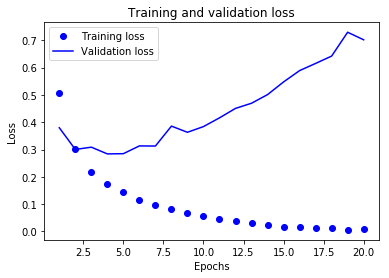

In [26]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"（'bo' 表示蓝色圆点）
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"（'b' 表示蓝色实线）
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

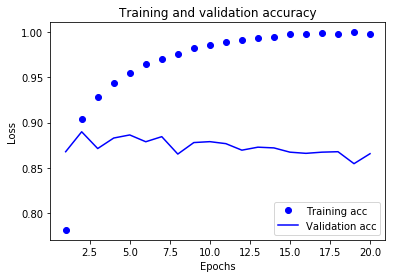

In [25]:
plt.clf()   # clear figure（清空图像）
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


The dots are the training loss and accuracy, while the solid lines are the validation loss and accuracy. Note that your own results may vary 
slightly due to a different random initialization of your network.

As you can see, the training loss decreases with every epoch and the training accuracy increases with every epoch. That's what you would 
expect when running gradient descent optimization -- the quantity you are trying to minimize should get lower with every iteration. But that 
isn't the case for the validation loss and accuracy: they seem to peak at the fourth epoch. This is an example of what we were warning 
against earlier: a model that performs better on the training data isn't necessarily a model that will do better on data it has never seen 
before. In precise terms, what you are seeing is "overfitting": after the second epoch, we are over-optimizing on the training data, and we 
ended up learning representations that are specific to the training data and do not generalize to data outside of the training set.

In this case, to prevent overfitting, we could simply stop training after three epochs. In general, there is a range of techniques you can 
leverage to mitigate overfitting, which we will cover in the next chapter.

Let's train a new network from scratch for four epochs, then evaluate it on our test data:

点是训练损失和准确率，而实线是验证损失和准确性。 请注意，由于网络的随机初始化不同，您自己的结果可能略有不同。

如你所见，训练损失每轮都在降低，训练精度每轮都在提升。这就是梯度下降优化的预期 结果——你想要最小化的量随着每次迭代越来越小。但验证损失和验证精度并非如此：它们似 乎在第四轮达到最佳值。这就是我们之前警告过的一种情况：模型在训练数据上的表现越来越好， 但在前所未见的数据上不一定表现得越来越好。准确地说，你看到的是过拟合（overfit）：在第二轮之后，你对训练数据过度优化，最终学到的表示仅针对于训练数据，无法泛化到训练集之外的数据。

在这种情况下，为了防止过拟合，你可以在 3 轮之后停止训练。通常来说，你可以使用许 多方法来降低过拟合，我们将在第 4 章中详细介绍。

我们从头开始训练一个新的网络，训练 4 轮，然后在测试数据上评估模型。


In [28]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 95us/step - loss: 0.4743 - acc: 0.8218
Epoch 2/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.2662 - acc: 0.9099
Epoch 3/4
25000/25000 [==============================] - 2s 80us/step - loss: 0.1984 - acc: 0.9296
Epoch 4/4
25000/25000 [==============================] - 3s 121us/step


In [29]:
results

[0.32367459528923037, 0.87376]

Our fairly naive approach achieves an accuracy of 88%. With state-of-the-art approaches, one should be able to get close to 95%.

这种相当简单的方法得到了 88% 的精度。利用最先进的方法，你应该能够得到接近 95% 的 精度。

## Using a trained network to generate predictions on new data

After having trained a network, you will want to use it in a practical setting. You can generate the likelihood of reviews being positive 
by using the `predict` method:

## 使用训练好的网络在新数据上生成预测结果

训练好网络之后，你希望将其用于实践。你可以用 predict 方法来得到评论为正面的可能性大小。


In [30]:
model.predict(x_test)

array([[0.13771522],
       [0.99972296],
       [0.29092878],
       ...,
       [0.07194319],
       [0.04204583],
       [0.4775203 ]], dtype=float32)

As you can see, the network is very confident for some samples (0.99 or more, or 0.01 or less) but less confident for others (0.6, 0.4). 

如你所见，网络对某些样本的结果非常确信（大于等于 0.99，或小于等于 0.01），但对其他结果却不那么确信（0.6 或 0.4）。



## Further experiments


* We were using 2 hidden layers. Try to use 1 or 3 hidden layers and see how it affects validation and test accuracy.
* Try to use layers with more hidden units or less hidden units: 32 units, 64 units...
* Try to use the `mse` loss function instead of `binary_crossentropy`.
* Try to use the `tanh` activation (an activation that was popular in the early days of neural networks) instead of `relu`.

These experiments will help convince you that the architecture choices we have made are all fairly reasonable, although they can still be 
improved!

## 进一步的实验
通过以下实验，你可以确信前面选择的网络架构是非常合理的，虽然仍有改进的空间。

* 前面使用了两个隐藏层。你可以尝试使用一个或三个隐藏层，然后观察对验证精度和测试精度的影响。

* 尝试使用更多或更少的隐藏单元，比如 32 个、64 个等。

* 尝试使用 mse 损失函数代替 binary_crossentropy。

* 尝试使用 tanh 激活（这种激活在神经网络早期非常流行）代替 relu。

这些实验将有助于说服您，我们所做的架构选择都是相当合理的，尽管它们仍然可以改进！


## Conclusions


Here's what you should take away from this example:

* There's usually quite a bit of preprocessing you need to do on your raw data in order to be able to feed it -- as tensors -- into a neural 
network. In the case of sequences of words, they can be encoded as binary vectors -- but there are other encoding options too.
* Stacks of `Dense` layers with `relu` activations can solve a wide range of problems (including sentiment classification), and you will 
likely use them frequently.
* In a binary classification problem (two output classes), your network should end with a `Dense` layer with 1 unit and a `sigmoid` activation, 
i.e. the output of your network should be a scalar between 0 and 1, encoding a probability.
* With such a scalar sigmoid output, on a binary classification problem, the loss function you should use is `binary_crossentropy`.
* The `rmsprop` optimizer is generally a good enough choice of optimizer, whatever your problem. That's one less thing for you to worry 
about.
* As they get better on their training data, neural networks eventually start _overfitting_ and end up obtaining increasingly worse results on data 
never-seen-before. Make sure to always monitor performance on data that is outside of the training set.

## 小结
下面是你应该从这个例子中学到的要点。

* 通常需要对原始数据进行大量预处理，以便将其转换为张量输入到神经网络中。单词序列可以编码为二进制向量，但也有其他编码方式。

* 带有 relu 激活的 Dense 层堆叠，可以解决很多种问题（包括情感分类），你可能会经常用到这种模型。

* 对于二分类问题（两个输出类别），网络的最后一层应该是只有一个单元并使用 sigmoid激活的 Dense 层，网络输出应该是 0~1 范围内的标量，表示概率值。

* 对于二分类问题的 sigmoid 标量输出，你应该使用 binary_crossentropy 损失函数。

* 无论你的问题是什么，rmsprop 优化器通常都是足够好的选择。这一点你无须担心。

* 随着神经网络在训练数据上的表现越来越好，模型最终会过拟合，并在前所未见的数据上得到越来越差的结果。一定要一直监控模型在训练集之外的数据上的性能。

